# CodersCave-batch 1-Data Science

## House Price Prediction-Golden Task

In [1]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Loading dataset

In [2]:
df=pd.read_csv("Data/house_price_prediction_dataset.csv")

### Display the first 5 rows of the dataset using head method

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Display the last 5 rows of the dataset using tail method

In [4]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


### Display the Shape of the dataset using shape attribute

In [5]:
df.shape

(20640, 10)

In [6]:
print("No.of Rows:",df.shape[0])
print("No.of Columns:",df.shape[1])

No.of Rows: 20640
No.of Columns: 10


### Display the overall statistics of the dataframe using describe method

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


### Display the overall information about the dataset using info method

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Check whether there are any null values in the dataset

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

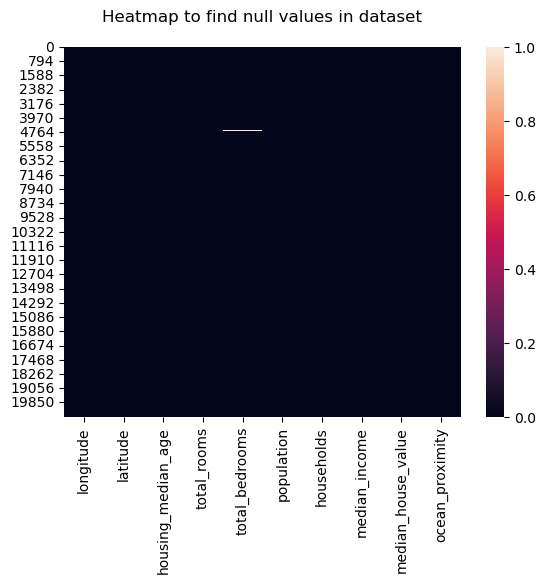

In [11]:
sea.heatmap(df.isnull())
plt.title("Heatmap to find null values in dataset\n")
plt.show()

### Drop the null/missing values from the dataset

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(20433, 10)

<Axes: >

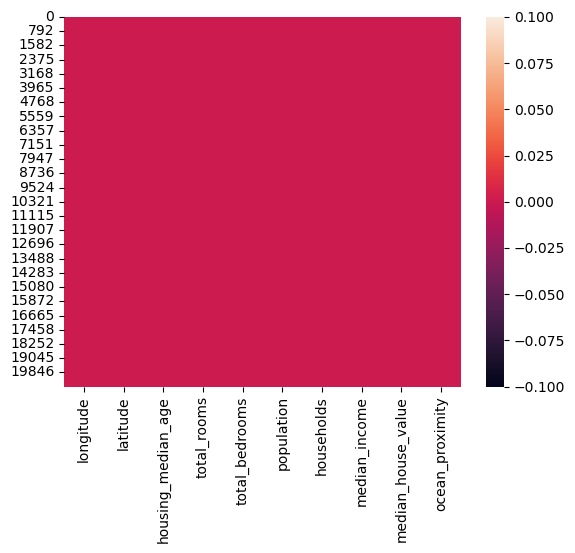

In [14]:
sea.heatmap(df.isnull())

In [15]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [16]:
X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
df_train=X_train.join(y_train)

In [19]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,198400.0
5065,-118.29,33.99,43.0,1902.0,398.0,1153.0,363.0,1.9375,<1H OCEAN,112900.0
10502,-117.70,33.47,21.0,2208.0,534.0,1423.0,482.0,3.5915,<1H OCEAN,305600.0
11789,-121.23,38.79,45.0,907.0,176.0,463.0,190.0,2.2292,INLAND,92000.0
5300,-118.45,34.07,19.0,4845.0,1609.0,3751.0,1539.0,1.5830,<1H OCEAN,350000.0
...,...,...,...,...,...,...,...,...,...,...
1957,-120.78,38.73,31.0,3117.0,616.0,1606.0,588.0,2.9844,INLAND,127900.0
5899,-118.31,34.16,37.0,2144.0,446.0,860.0,435.0,3.9464,<1H OCEAN,315000.0
3724,-118.42,34.18,27.0,3760.0,880.0,2022.0,812.0,3.1551,<1H OCEAN,225600.0
4568,-118.26,34.06,42.0,2541.0,1282.0,3974.0,1189.0,1.5854,<1H OCEAN,87500.0


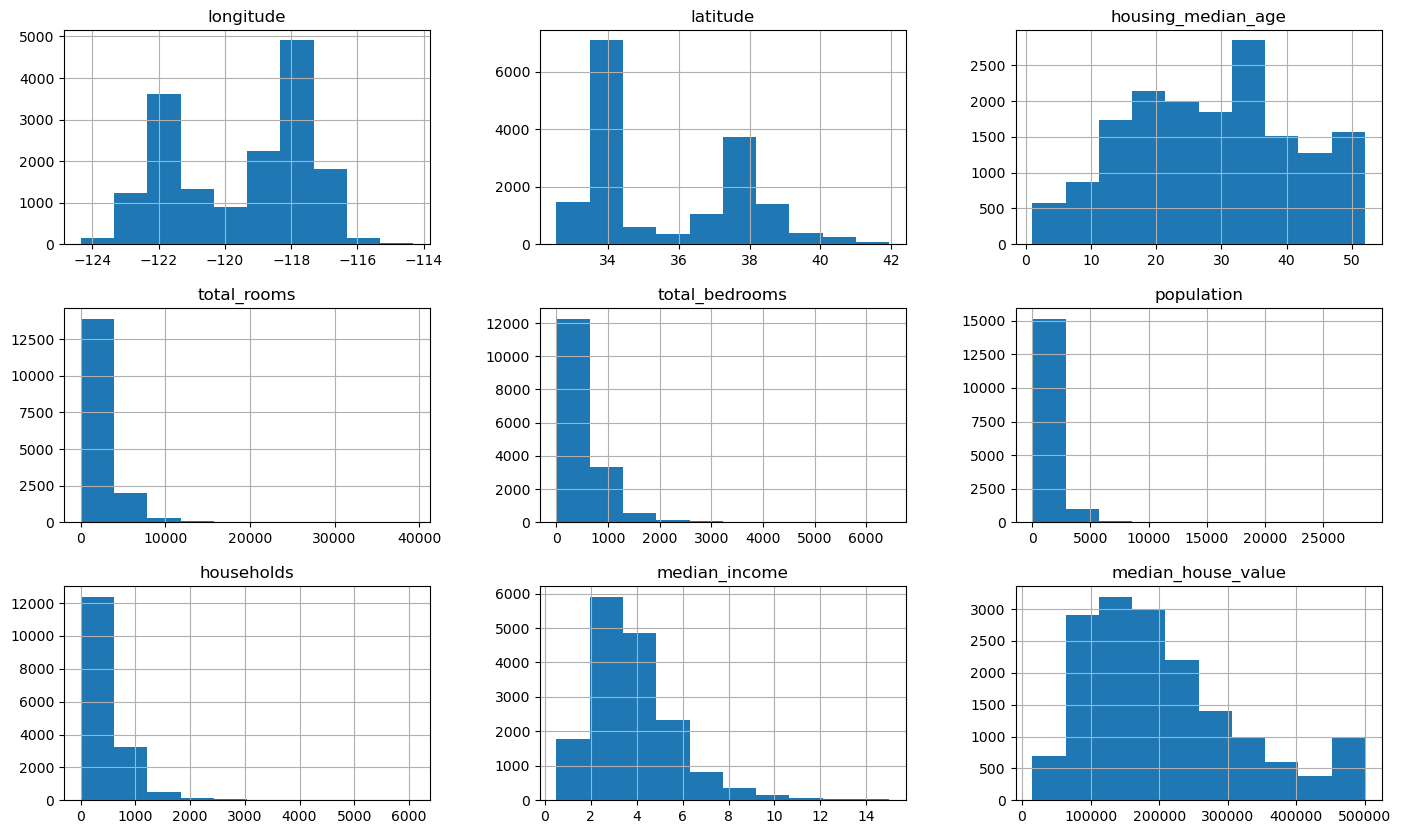

In [20]:
df_train.hist(figsize = (17,10))
plt.show()

In [21]:
df_train['total_rooms'] = np.log(df_train['total_rooms']+1)
df_train['total_bedrooms'] = np.log(df_train['total_bedrooms']+1)
df_train['population'] = np.log(df_train['population']+1)
df_train['households'] = np.log(df_train['households']+1)

In [22]:
df_train = df_train.join(pd.get_dummies(df_train.ocean_proximity)).drop(['ocean_proximity'],axis= 1)

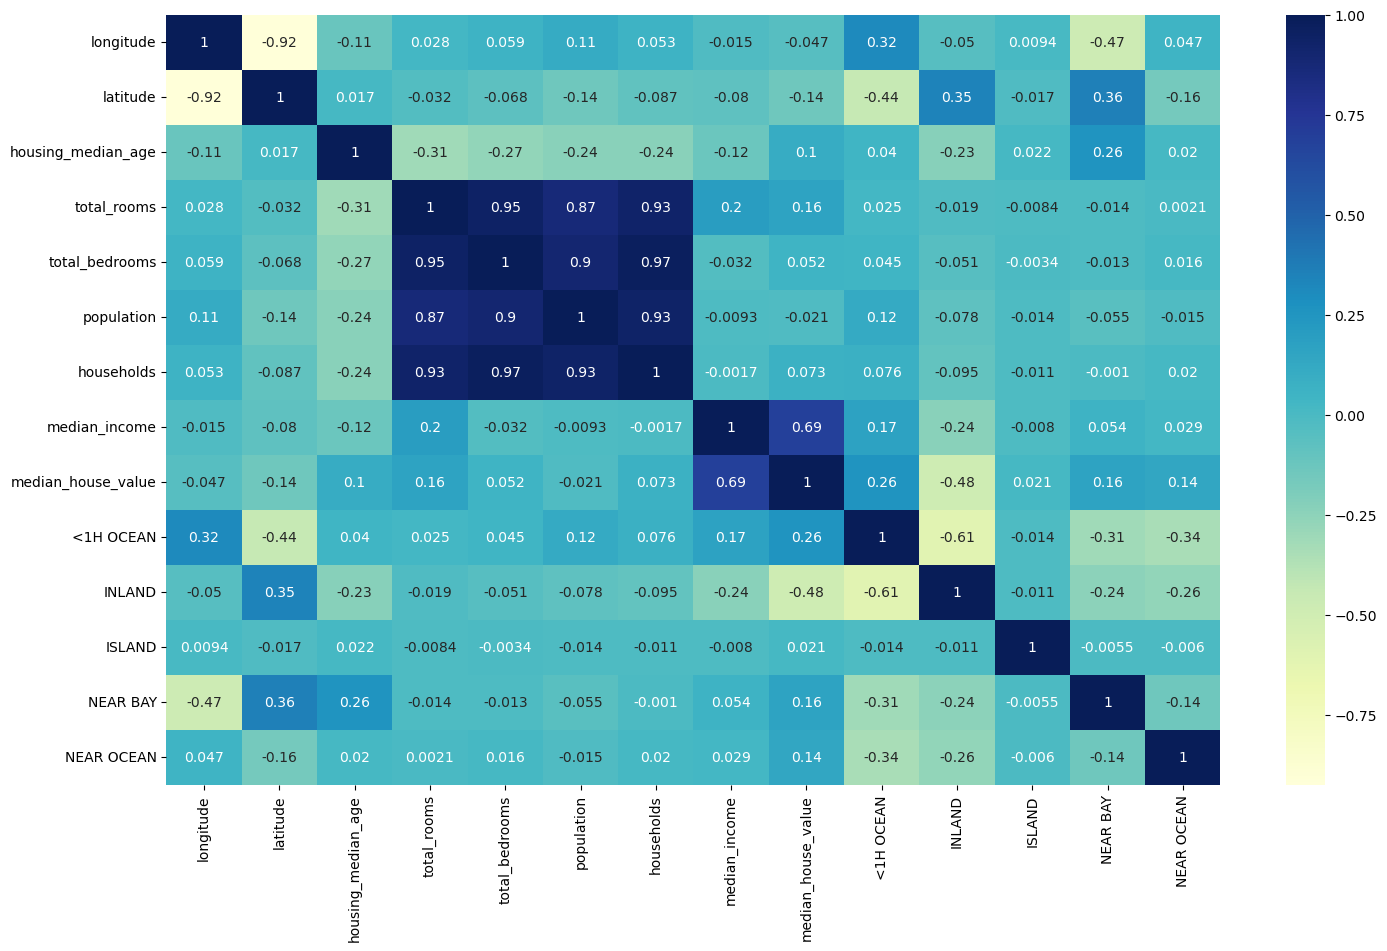

In [23]:
plt.figure(figsize=(17,10))
sea.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [24]:
df_train['bedroom_ratio']=df_train['total_bedrooms']/df_train['total_rooms']
df_train['household_rooms']=df_train['total_rooms']/df_train['households']

<Axes: >

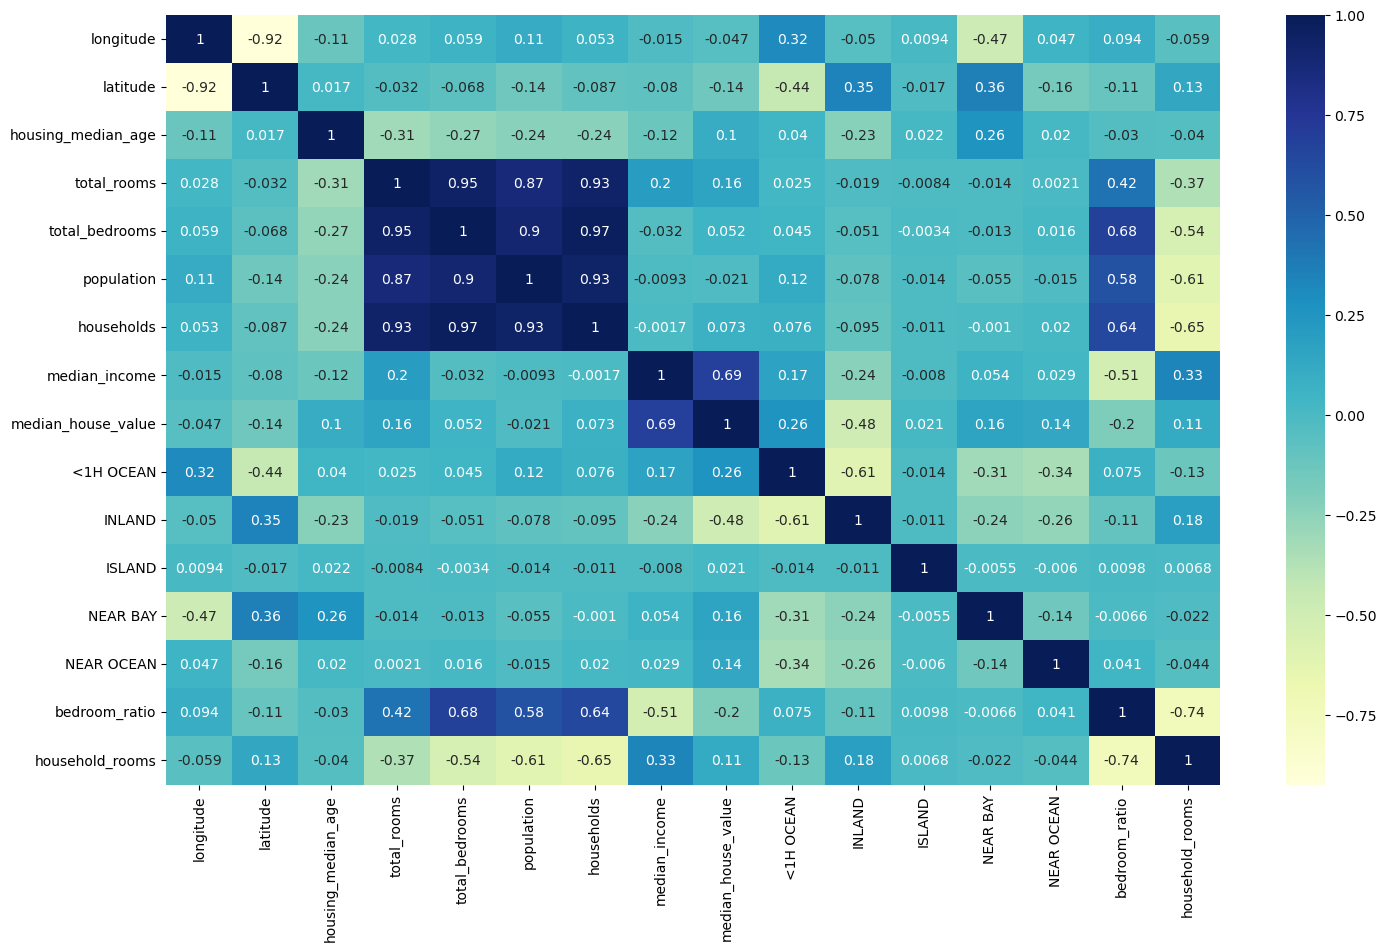

In [25]:
plt.figure(figsize=(17,10))
sea.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")

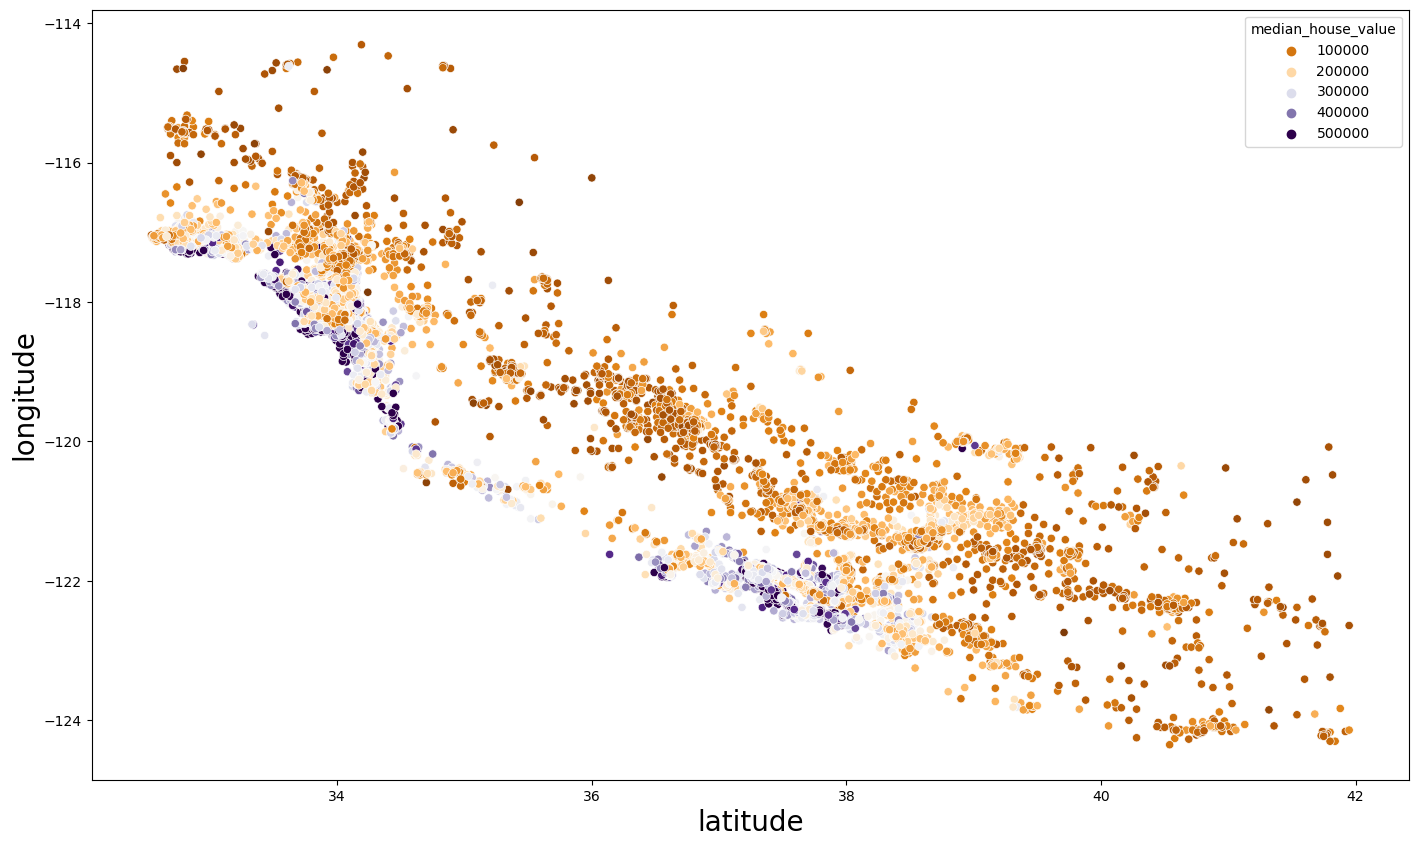

In [26]:
plt.figure(figsize=(17,10))
sea.scatterplot(x="latitude",y="longitude",data=df_train,hue="median_house_value",palette='PuOr')
plt.xlabel('latitude',size=20)
plt.ylabel('longitude',size=20)
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [28]:
sc=StandardScaler()
X_train,y_train=df_train.drop(['median_house_value'],axis=1),df_train['median_house_value']
X_train_s=sc.fit_transform(X_train)
LR=LinearRegression()
LR.fit(X_train_s, y_train)

LinearRegression()

In [29]:
df_test=X_test.join(y_test)
df_test['total_rooms'] = np.log(df_test['total_rooms']+1)
df_test['total_bedrooms'] = np.log(df_test['total_bedrooms']+1)
df_test['population'] = np.log(df_test['population']+1)
df_test['households'] = np.log(df_test['households']+1)

In [30]:
df_test=df_test.join(pd.get_dummies(df_test.ocean_proximity)).drop(['ocean_proximity'],axis= 1)
df_test['bedroom_ratio'] =df_test['total_bedrooms']/df_test['total_rooms']
df_test['household_rooms'] =df_test['total_rooms']/df_test['households']

In [31]:
X_test, y_test =df_test.drop(['median_house_value'],axis=1),df_test['median_house_value']

In [32]:
X_test_s = sc.transform(X_test)

In [33]:
LR.score(X_test_s, y_test)

0.6643824492609809

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
forest.score(X_test, y_test)

0.813914794751304

In [36]:
from sklearn.model_selection import GridSearchCV
grid={
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8],
    "max_depth": [None, 4, 8]
}
grid_search=GridSearchCV(forest,grid, cv=5,scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
best_forest=grid_search.best_estimator_

In [38]:
best_forest.score(X_test_s, y_test)

0.8044951390245716

In [39]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)